# Punto 1 - Importación y Procesamiento de Datos

El primer paso para poder realizar los análisis y modelos de Machine Learning es importar los datos y realizar el procesamiento de los mismos. En este caso, debemos importar la información de los vinos blancos y los vinos rojos y juntar todo en una única tabla.

Para facilitar el trabajo, se emplea la librería de Python ```pandas``` y en particular la estructura de datos ```pd.DataFrame()```.

In [1]:
import pandas as pd

# Importar los datos de vino blanco y rojo
red_wine_dataframe = pd.read_csv("winequality-red.csv", sep=";")
white_wine_dataframe = pd.read_csv("winequality-white.csv", sep=";")

# Unificar los dos DataFrames en una única tabla
wine_combined_dataframe = pd.concat([red_wine_dataframe, white_wine_dataframe], axis=0)
wine_combined_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


A continuación, se realiza el procesamiento de los datos importados en la tabla unificada. El proceso consiste en separar los features (clasificadores) de las etiquetas. En este caso, la salida del clasificador es el nivel de calidad del vino (un valor numérico), toda vez que los features también son valores numéricos que se separan en un DataFrame diferente.

In [2]:
features_dataframe = wine_combined_dataframe.drop(["quality"], axis=1)
labels_dataframe = wine_combined_dataframe["quality"]

In [3]:
features_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
labels_dataframe.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## División en conjunto de entrenamiento y prueba

A continuación, se hace uso de la librería ```sklearn``` para realizar la separación de los datos en un conjunto aleatorio de datos de entrenamiento para preparar el modelo de la Red Neuronal y un conjunto de prueba para realizar la validación del modelo. Se toma la proporción 80%-20% para tal fin.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_dataframe, labels_dataframe,
                                                    test_size=0.2, random_state=42)

# Imprimir las dimensiones de los DataFrames para revisar correctitud de separación
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


## Scatterplot de pares de features

A continuación, se realiza el scatterplot (Diagrama de Distribución) de parejas de atributos de los datos. Se realiza la gráfica cinco veces en total, utilizando para cada iteración atributos que no habían sido utilizados anteriormente.

In [6]:
from colour import Color

# Definir una lista de colores que gradúan desde rojo (1) hasta verde (7)
red = Color("red")
colors = list(red.range_to(Color("green"), 7))
colors = [str(c) for c in colors]

print(colors)

# Determinar el color de cada registro en el DataFrame combinado
wine_color = [colors[n-3] for n in wine_combined_dataframe["quality"].tolist()]

['red', '#ea4e00', '#d58e00', '#bfbf00', '#72aa00', '#329500', 'green']


Se definen los colores que se desea asignar a cada uno de los registros, dependiendo de la calidad del vino. A continuación, se generan los diagramas de dispersión empleando la indexación de columnas del DataFrame. Se ignora la columna de la Densidad pues es el atributo con mayor cantidad de cifras decimales significativas. Es poco probable que afecte en el modelo si se tienen medidas tan precisas y cercanas.

Por ello, para emparejar los features, se hizo la selección por proximidad inmediata.

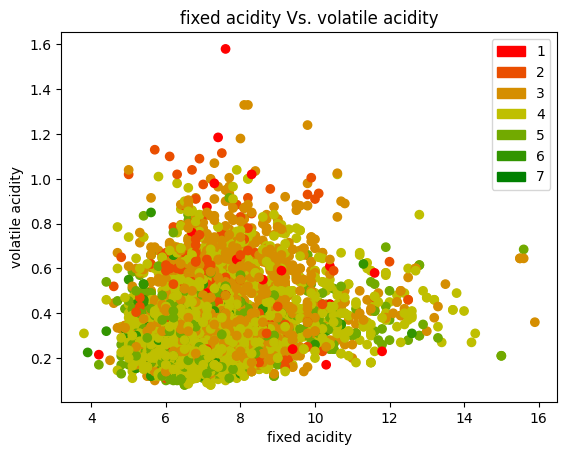

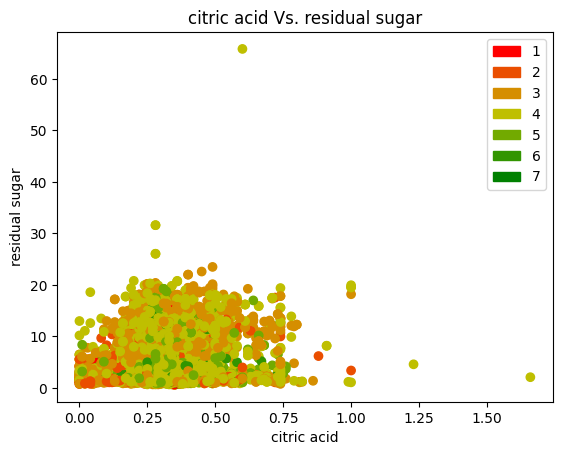

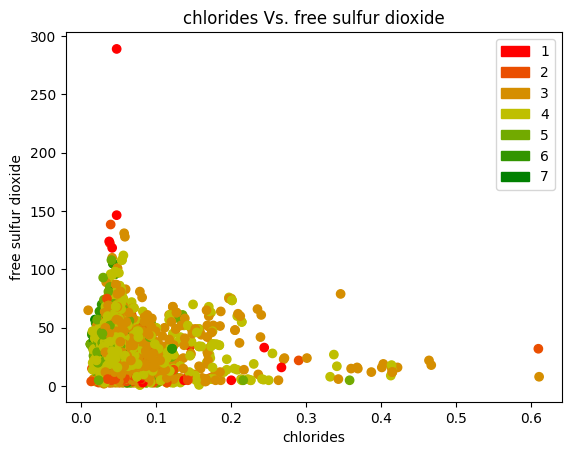

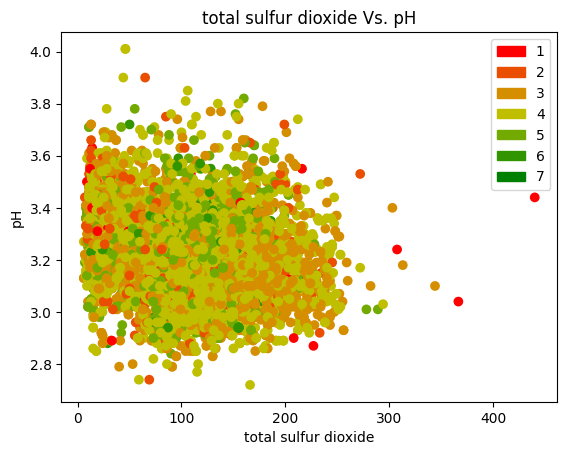

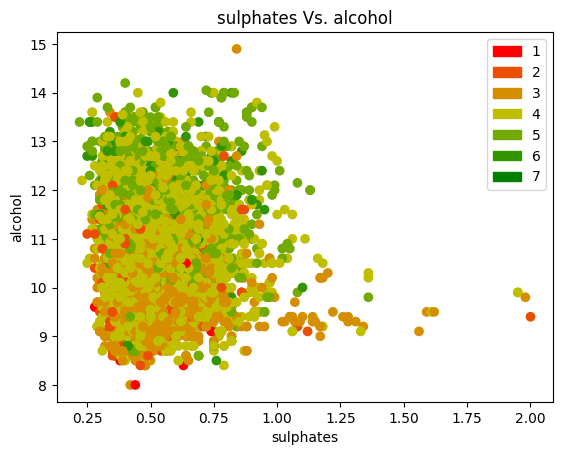

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

wine_scatter_df = wine_combined_dataframe.drop(["density"], axis=1)
patches = []

for c in range(len(colors)):
  patches.append(mpatches.Patch(color=colors[c], label=c+1))

for i in range(0, wine_scatter_df.shape[1]-1, 2):
  x_scatter = wine_scatter_df.iloc[:,i].tolist()
  y_scatter = wine_scatter_df.iloc[:,i+1].tolist()

  plt.scatter(x_scatter, y_scatter, c=wine_color)
  plt.xlabel(wine_scatter_df.columns[i])
  plt.ylabel(wine_scatter_df.columns[i+1])
  plt.title(wine_scatter_df.columns[i] + str(" Vs. ") + wine_scatter_df.columns[i+1])
  plt.legend(handles=patches)
  plt.show()
  print("\n")

# Punto 2 - Red Neuronal

En segunda instancia, se crea un modelo de Red Neuronal empleando la librería ```sklearn.neural_network``` y en específico, la clase MLPRegressor. El diseño de la red neuronal sigue la siguiente arquitectura:

* 1 Capa Oculta de 10 neuronas
* Función de activación: Tangente Hiperbólica ($tanh$)
* Límite superior de Iteraciones: 1000

Se crea un modelo por cada solver requerido (lbfgs, sgd, adam).

In [8]:
from sklearn.neural_network import MLPRegressor

red_lbfgs = MLPRegressor(hidden_layer_sizes=[10], activation='tanh', max_iter=1000, solver='lbfgs')
red_sgd = MLPRegressor(hidden_layer_sizes=[10], activation='tanh', max_iter=1000, solver='sgd')
red_adam = MLPRegressor(hidden_layer_sizes=[10], activation='tanh', max_iter=1000, solver='adam')

Se realiza el entrenamiento de las redes neuronales con los datos de entrenamiento.

In [9]:
red_lbfgs.fit(x_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=[10], max_iter=1000,
             solver='lbfgs')

In [10]:
red_sgd.fit(x_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=[10], max_iter=1000,
             solver='sgd')

In [11]:
red_adam.fit(x_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=[10], max_iter=1000)

# Punto 3 - Evaluación del desempeño de los optimizadores

La función de pérdidas es una métrica que cuantifica cuán bien o mal se está desempeñando el modelo en la tarea de interés. Es una medida de error entre las predicciones del modelo y los valores reales.

A continuación, se implementa el código para graficar la función de pérdidas:


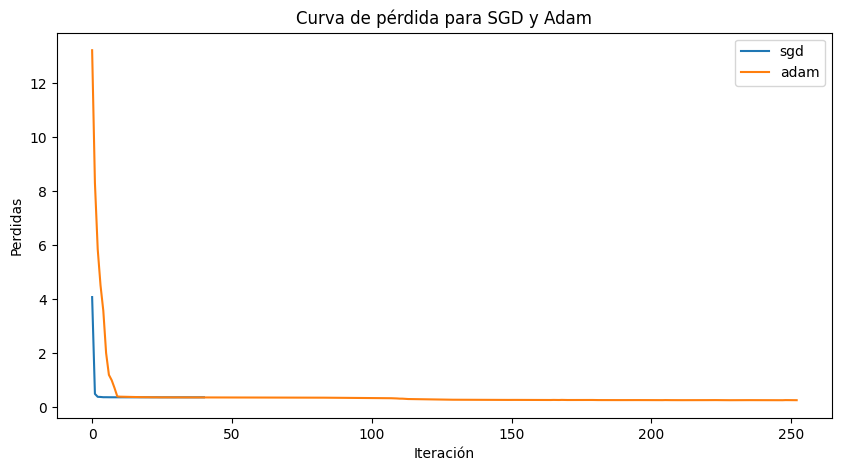

In [12]:
import matplotlib.pyplot as plt


loss_history = {
    'sgd': red_sgd.loss_curve_,
    'adam': red_adam.loss_curve_
}

plt.figure(figsize=(10, 5))

for solver, losses in loss_history.items():
    plt.plot(losses, label=solver)

plt.xlabel('Iteración')
plt.ylabel('Perdidas')
plt.title('Curva de pérdida para SGD y Adam')
plt.legend()
plt.show()



Por otro lado, en seguida se van a evaluar el desempeño de los modelos tanto con los datos del set de entrenamiento como con los datos del set de prueba.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score


# Evaluar el desempeño en los datos de entrenamiento y prueba
models = {'lbfgs': red_lbfgs, 'sgd': red_sgd, 'adam': red_adam}
metrics = {}

for name, model in models.items():
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    metrics[name] = {
        'train_score': model.score(x_train, y_train),
        'test_score': model.score(x_test, y_test),
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

for name, metric in metrics.items():
    print(f"Model: {name}")
    print(f"  Score de entrenamiento (R^2): {metric['train_score']:.4f}")
    print(f"  Score de prueba (R^2): {metric['test_score']:.4f}")
    print(f"  MSE de entrenamiento: {metric['train_mse']:.4f}")
    print(f"  MSE de prueba: {metric['test_mse']:.4f}")
    print(f"  R^2 de entrenamiento: {metric['train_r2']:.4f}")
    print(f"  R^2 de prueba: {metric['test_r2']:.4f}")
    print()



Model: lbfgs
  Score de entrenamiento (R^2): 0.2993
  Score de prueba (R^2): 0.2638
  MSE de entrenamiento: 0.5384
  MSE de prueba: 0.5437
  R^2 de entrenamiento: 0.2993
  R^2 de prueba: 0.2638

Model: sgd
  Score de entrenamiento (R^2): 0.0248
  Score de prueba (R^2): 0.0063
  MSE de entrenamiento: 0.7493
  MSE de prueba: 0.7339
  R^2 de entrenamiento: 0.0248
  R^2 de prueba: 0.0063

Model: adam
  Score de entrenamiento (R^2): 0.2952
  Score de prueba (R^2): 0.2699
  MSE de entrenamiento: 0.5416
  MSE de prueba: 0.5392
  R^2 de entrenamiento: 0.2952
  R^2 de prueba: 0.2699



Finalmente, vamos a realizar un esquema de validación cruzada 5 -folds para ver como cambian los resultados en cada iteración.

In [14]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = x_train
y = y_train

X = np.array(X)
y = np.array(y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {name: {'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': []} for name in models.keys()}

for name, model in models.items():
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)

        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)

        results[name]['train_mse'].append(train_mse)
        results[name]['test_mse'].append(test_mse)
        results[name]['train_r2'].append(train_r2)
        results[name]['test_r2'].append(test_r2)

for name, result in results.items():
    print(f"Model: {name}")
    print(f"  Average Training MSE: {np.mean(result['train_mse']):.4f}")
    print(f"  Average Test MSE: {np.mean(result['test_mse']):.4f}")
    print(f"  Average Training R^2: {np.mean(result['train_r2']):.4f}")
    print(f"  Average Test R^2: {np.mean(result['test_r2']):.4f}")
    print()



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Model: lbfgs
  Average Training MSE: 0.5719
  Average Test MSE: 0.5826
  Average Training R^2: 0.2553
  Average Test R^2: 0.2413

Model: sgd
  Average Training MSE: 0.7620
  Average Test MSE: 0.7629
  Average Training R^2: 0.0084
  Average Test R^2: 0.0051

Model: adam
  Average Training MSE: 0.5398
  Average Test MSE: 0.5514
  Average Training R^2: 0.2973
  Average Test R^2: 0.2809



Los datos se dividen de manera diferente en cada fold, lo que significa que el modelo se entrena y evalúa en diferentes subconjuntos de datos. Esto puede llevar a variaciones en el rendimiento debido a la distribución de los datos en los diferentes folds producto de la aleatoriedad en el entrenamiento y, además, al no estár perfectamente equilibrados en términos de las características y la variable objetivo, los diferentes folds pueden contener diferentes proporciones de estas características, lo que puede influir en el rendimiento del modelo.\
Finalmente, se encontró que el modelo que mejor se ajusta al problema de caracterización es el Adam. Lo anterior debido a que se tienen mejores métricas en el desempeño del mismo, es decir, mejor valor de score, error cuadratico medio y valor de R^2.